In [107]:
# Data Loading and Numerical Operations
import numpy as np
import pandas as pd
# Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Time conversion
from datetime import datetime, timedelta
warnings.filterwarnings('ignore')
# Data Scaling
from sklearn.preprocessing import MinMaxScaler
# Data Splitting
from sklearn.model_selection import train_test_split
# Data Modeling
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from scipy import stats

## Importing Cab_Data.csv

In [2]:
df_cab = pd.read_csv("Cab_Data.csv")
df_cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [3]:
df_cab.shape #  print the number of rows and columns of my DataFrame

(359392, 7)

### Checking Statistical Measure:

In [4]:
df_cab.describe() #The describe() method returns description of the data in the DataFrame

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


### Data Preprocessing 

In [5]:
df_cab.isnull().sum().sort_values(ascending=False) # df.isnull().sum() prints the column with missing value.

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [6]:
df_cab.duplicated().sum()

0

In [7]:
df_cab.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip'],
      dtype='object')

In [8]:
df_cab_group = df_cab[['KM Travelled','Company']].groupby('Company').sum()
df_cab_group # Output says yellow cab travelled more kms than pink cab

,KM Travelled
Company,
Pink Cab,1911073.11
Yellow Cab,6199417.47


In [9]:
id = df_cab[['Company']]
id.value_counts()
print(id.value_counts()) # Yellow cab was having maxiumum cab users

Company   
Yellow Cab    274681
Pink Cab       84711
dtype: int64


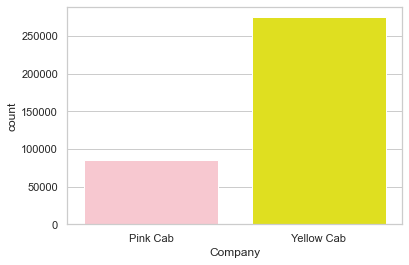

In [10]:
sns.set_theme(style="whitegrid")
Companies = sns.countplot(x="Company", palette=['Pink', 'Yellow'], data=df_cab)

In [11]:
from datetime import datetime,timedelta

In [12]:
datetime.strftime(datetime(1899, 12, 30) + timedelta(days=43465), '%d/%m/%y')

'31/12/18'

In [13]:
df_cab['Date'] =df_cab['Date of Travel'].apply(lambda x: datetime.strftime(datetime(1899, 12, 30) + timedelta(days=x), '%d/%m/%y'))

In [14]:
df_cab=df_cab.drop(['Date of Travel'],axis=1)

In [15]:
df_cab

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Date
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,08/01/16
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,06/01/16
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,02/01/16
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,07/01/16
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,03/01/16
...,...,...,...,...,...,...,...
359387,10440101,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,08/01/18
359388,10440104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,04/01/18
359389,10440105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,05/01/18
359390,10440106,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,05/01/18


In [16]:
df_cab['Profit']=df_cab['Price Charged']-df_cab['Cost of Trip']
df_cab

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Date,Profit
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,08/01/16,57.3150
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,06/01/16,23.6660
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,02/01/16,27.5680
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,07/01/16,25.7980
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,03/01/16,16.8440
...,...,...,...,...,...,...,...,...
359387,10440101,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,08/01/18,5.8800
359388,10440104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,04/01/18,6.9020
359389,10440105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,05/01/18,87.4200
359390,10440106,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,05/01/18,32.1420


In [17]:
df_cab.sort_values(by=['Profit']) # in some trips there are loss (observation in profit column)

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Date,Profit
118348,10145287,Pink Cab,DALLAS TX,44.80,317.54,537.6000,19/02/17,-220.0600
18954,10024048,Pink Cab,DALLAS TX,42.56,303.51,502.2080,13/04/16,-198.6980
54991,10069188,Yellow Cab,TUCSON AZ,44.07,415.37,592.3008,28/08/16,-176.9308
23384,10029696,Pink Cab,DALLAS TX,43.29,328.85,497.8350,04/05/16,-168.9850
115200,10141320,Pink Cab,DALLAS TX,48.00,354.36,518.4000,30/01/17,-164.0400
...,...,...,...,...,...,...,...,...
138732,10170703,Yellow Cab,NEW YORK NY,41.65,1918.14,509.7960,30/04/17,1408.3440
138548,10170519,Yellow Cab,NEW YORK NY,41.81,1981.05,556.9092,30/04/17,1424.1408
138766,10170737,Yellow Cab,NEW YORK NY,43.20,2013.95,580.6080,30/04/17,1433.3420
138669,10170640,Yellow Cab,NEW YORK NY,43.29,2016.70,571.4280,05/05/17,1445.2720


## Importing City.csv 
### -- this file contains list of US cities, their population and number of cab users

In [18]:
df_city = pd.read_csv("City.csv")
df_city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


#### City -
#### Population - 
#### Users - 

In [86]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [19]:
df_city.shape #  print the number of rows and columns of my DataFrame

(20, 3)

In [20]:
df_city.head(5) # The head() function is used to get the first n rows.

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [21]:
df_city.tail(5) # The tail() function is used to get the last n rows.

,City,Population,Users
15,SACRAMENTO CA,"545,776","7,044"
16,PITTSBURGH PA,"542,085","3,643"
17,WASHINGTON DC,"418,859","127,001"
18,NASHVILLE TN,"327,225","9,270"
19,BOSTON MA,"248,968","80,021"


In [22]:
df_city.describe() #The describe() method returns description of the data in the DataFrame

,City,Population,Users
count,20,20,20
unique,20,20,20
top,NEW YORK NY,"8,405,837","302,149"
freq,1,1,1


In [23]:
df_city.isnull().sum().sort_values(ascending=False) # prints the column with missing value.

City          0
Population    0
Users         0
dtype: int64

### Identify and remove duplicates

In [24]:
df_city.duplicated().sum()

0

In [25]:
df_customer = pd.read_csv("Customer_ID.csv")
df_customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [26]:
df_customer.shape #  print the number of rows and columns of my DataFrame

(49171, 4)

In [27]:
df_customer.head(5)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [28]:
df_customer.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


### Perform other analysis like NA value and outlier detection

In [29]:
df_customer.isnull().sum().sort_values(ascending=False)

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [30]:
df_city.duplicated().sum()

0

In [31]:
df_transaction = pd.read_csv("Transaction_ID.csv")
df_transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [32]:
df_transaction.shape

(440098, 3)

In [33]:
df_transaction.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


In [34]:
df_transaction.isnull().sum().sort_values(ascending=False)

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [35]:
df_transaction.duplicated().sum()

0

In [141]:
df= df_cab.merge(df_transaction, on= 'Transaction ID').merge(df_customer, on ='Customer ID').merge(df_city, on = 'City')
df.head(10)

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Date,Profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,08/01/16,57.3150,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,21/07/18,281.2772,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,23/11/18,194.6480,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,06/01/16,23.6660,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,21/04/18,253.9808,27703,Card,Male,27,9237,"814,885","24,701"
5,10324737,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,04/05/18,50.8912,27703,Cash,Male,27,9237,"814,885","24,701"
6,10395626,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,27/10/18,25.0960,27703,Card,Male,27,9237,"814,885","24,701"
7,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,02/01/16,27.5680,28712,Cash,Male,53,11242,"814,885","24,701"
8,10079404,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,21/09/16,210.0920,28712,Card,Male,53,11242,"814,885","24,701"
9,10186994,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,23/06/17,118.9736,28712,Card,Male,53,11242,"814,885","24,701"


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Company             359392 non-null  object 
 2   City                359392 non-null  object 
 3   KM Travelled        359392 non-null  float64
 4   Price Charged       359392 non-null  float64
 5   Cost of Trip        359392 non-null  float64
 6   Date                359392 non-null  object 
 7   Profit              359392 non-null  float64
 8   Customer ID         359392 non-null  int64  
 9   Payment_Mode        359392 non-null  object 
 10  Gender              359392 non-null  object 
 11  Age                 359392 non-null  int64  
 12  Income (USD/Month)  359392 non-null  int64  
 13  Population          359392 non-null  object 
 14  Users               359392 non-null  object 
dtypes: float64(4), int64(4), object(7)

In [143]:
df.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Profit,Customer ID,Age,Income (USD/Month)
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,137.253198,19191.652115,35.336705,15048.822937
std,1.268058e+05,12.233526,274.378911,157.993661,160.311840,21012.412463,12.594234,7969.409482
min,1.000001e+07,1.900000,15.600000,19.000000,-220.060000,1.000000,18.000000,2000.000000
25%,1.011081e+07,12.000000,206.437500,151.200000,28.012000,2705.000000,25.000000,8424.000000
50%,1.022104e+07,22.440000,386.360000,282.480000,81.962000,7459.000000,33.000000,14685.000000
75%,1.033094e+07,32.960000,583.660000,413.683200,190.030000,36078.000000,42.000000,21035.000000
max,1.044011e+07,48.000000,2048.030000,691.200000,1463.966000,60000.000000,65.000000,35000.000000


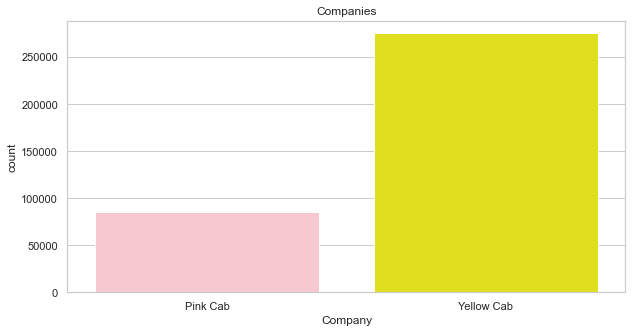

In [144]:
plt.figure(figsize=(10,5))
Companies = sns.countplot(x="Company", palette=['Pink', 'Yellow'], data=df_cab)
plt.title("Companies")
plt.show()

In [145]:
df.isnull().sum().sort_values(ascending=False)

Transaction ID        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Date                  0
Profit                0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

In [146]:
#Checking relationship between variables
cor=df.corr()
cor

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Profit,Customer ID,Age,Income (USD/Month)
Transaction ID,1.000000,-0.001429,-0.052902,-0.003462,-0.087130,-0.016912,-0.001267,-0.001570
KM Travelled,-0.001429,1.000000,0.835753,0.981848,0.462768,0.000389,-0.000369,-0.000544
Price Charged,-0.052902,0.835753,1.000000,0.859812,0.864154,-0.177324,-0.003084,0.003228
Cost of Trip,-0.003462,0.981848,0.859812,1.000000,0.486056,0.003077,-0.000189,-0.000633
Profit,-0.087130,0.462768,0.864154,0.486056,1.000000,-0.306527,-0.005093,0.006148
Customer ID,-0.016912,0.000389,-0.177324,0.003077,-0.306527,1.000000,-0.004735,-0.013608
Age,-0.001267,-0.000369,-0.003084,-0.000189,-0.005093,-0.004735,1.000000,0.003907
Income (USD/Month),-0.001570,-0.000544,0.003228,-0.000633,0.006148,-0.013608,0.003907,1.000000


In [147]:
# We will change Age to Class Format

labels = ["{0} - {1}".format(i, i + 9) for i in range(10, 70, 10)]
df["Age group"] = pd.cut(df.Age, range(10,75, 10), right=False, labels=labels)
df

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Date,Profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Age group
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,08/01/16,57.3150,29290,Card,Male,28,10813,"814,885","24,701",20 - 29
1,10351127,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,21/07/18,281.2772,29290,Cash,Male,28,10813,"814,885","24,701",20 - 29
2,10412921,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,23/11/18,194.6480,29290,Card,Male,28,10813,"814,885","24,701",20 - 29
3,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,06/01/16,23.6660,27703,Card,Male,27,9237,"814,885","24,701",20 - 29
4,10320494,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,21/04/18,253.9808,27703,Card,Male,27,9237,"814,885","24,701",20 - 29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,03/03/18,143.6180,51406,Cash,Female,29,6829,"418,859","127,001",20 - 29
359388,10319775,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,13/04/18,23.0464,51406,Cash,Female,29,6829,"418,859","127,001",20 - 29
359389,10347676,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,06/07/18,-5.8540,51406,Card,Female,29,6829,"418,859","127,001",20 - 29
359390,10358624,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,02/08/18,-6.0900,51406,Cash,Female,29,6829,"418,859","127,001",20 - 29


In [148]:
df.columns

Index(['Transaction ID', 'Company', 'City', 'KM Travelled', 'Price Charged',
       'Cost of Trip', 'Date', 'Profit', 'Customer ID', 'Payment_Mode',
       'Gender', 'Age', 'Income (USD/Month)', 'Population', 'Users',
       'Age group'],
      dtype='object')

In [149]:
# Multivariate analysis

#Plotting a linegraph to check the relationship between Profit and Price Charged,Age, Cost of Trip.
df.groupby(['Company','Price Charged','Cost of Trip','Age','KM Travelled'])['Profit'].mean()


Company     Price Charged  Cost of Trip  Age  KM Travelled
Pink Cab    15.60          21.3840       34   1.98              -5.7840
            15.75          24.7800       32   2.10              -9.0300
            16.38          19.3800       43   1.90              -3.0000
            16.53          19.2000       57   1.92              -2.6700
            16.76          19.9820       18   1.94              -3.2220
                                                                ...    
Yellow Cab  1981.05        556.9092      37   41.81           1424.1408
            1993.83        594.7200      60   47.20           1399.1100
            2013.95        580.6080      64   43.20           1433.3420
            2016.70        571.4280      37   43.29           1445.2720
            2048.03        584.0640      18   46.80           1463.9660
Name: Profit, Length: 359386, dtype: float64

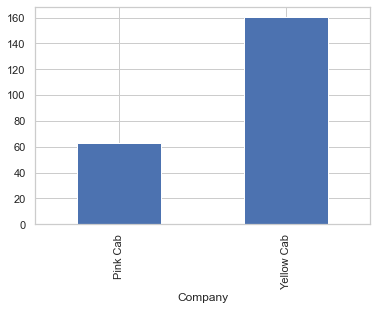

In [150]:
graph_1 =df.groupby(['Company'])['Profit'].mean().plot(kind='bar')

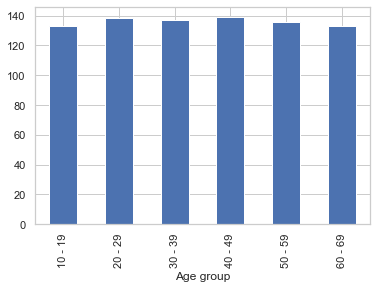

In [151]:
graph_2 = df.groupby(['Age group'])['Profit'].mean().plot(kind='bar')

<AxesSubplot:title={'center':"Profit made by both the Company's "}, ylabel='Profit'>

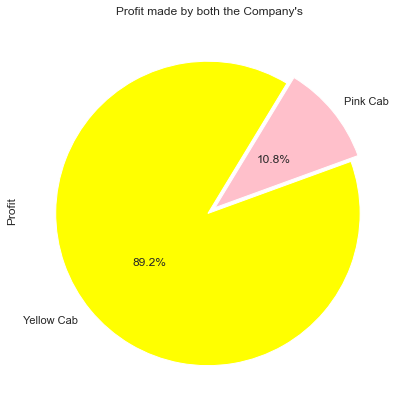

In [152]:
# Profit per cabs
plt.title("Profit made by both the Company's ")
df.groupby('Company')['Profit'].sum().plot(kind='pie',y='Company',startangle=20,colors = ("pink", "yellow") ,figsize=(15,7),autopct='%1.1f%%',explode=[0.03]*2,pctdistance=0.5)

In [153]:
np.dtype(df['Date'])

dtype('O')

In [154]:
df['Date']=pd.to_datetime(df['Date'])

In [155]:
df.groupby([df['Date'].dt.year,'Company'])['Profit'].mean()

Date  Company   
2016  Pink Cab       68.321819
      Yellow Cab    169.347821
2017  Pink Cab       67.070839
      Yellow Cab    168.817057
2018  Pink Cab       53.229689
      Yellow Cab    143.416122
Name: Profit, dtype: float64

### Which company has maximum cab users at a particular time period?

In [177]:
df.groupby([df['Date'].dt.year,'Company'])['Customer ID'].count()

Date  Company   
2016  Pink Cab      25073
      Yellow Cab    79389
2017  Pink Cab      30308
      Yellow Cab    94890
2018  Pink Cab      29301
      Yellow Cab    92608
Name: Customer ID, dtype: int64

### In 2016, 2017 and 2018, Yellow cab has maximum customers

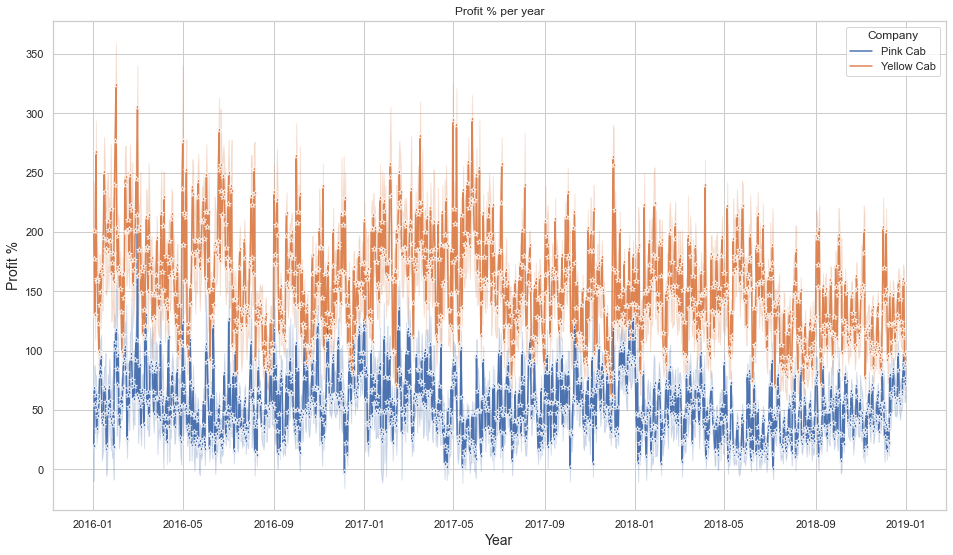

In [156]:
plt.figure(figsize = (16, 9))
sns.lineplot(x='Date', y='Profit', hue='Company', data=df, marker='*')
plt.xlabel("Year", size=14)
plt.ylabel("Profit %", size=14)
plt.title("Profit % per year")
plt.show()

### outlier detection and removal

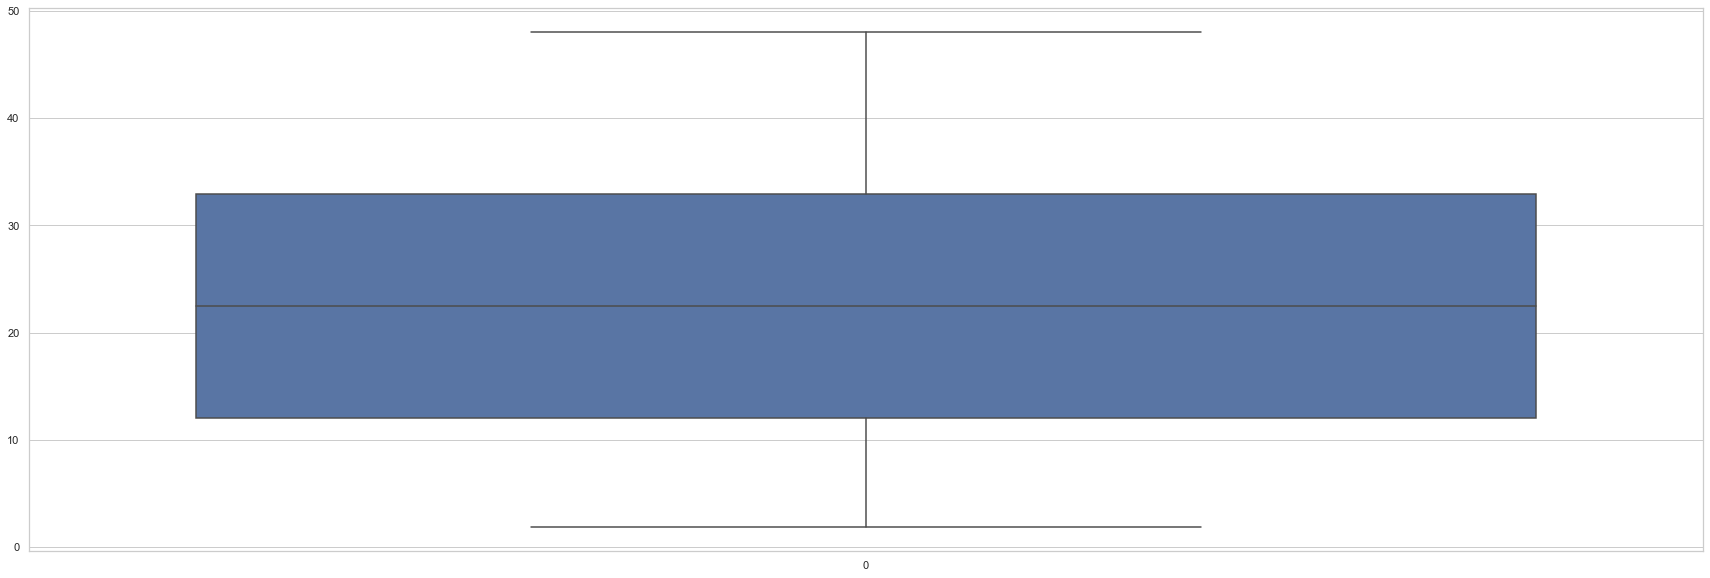

In [158]:
plt.figure(figsize=(30,10), facecolor='w')
sns.boxplot(data=df['KM Travelled'])
plt.show()

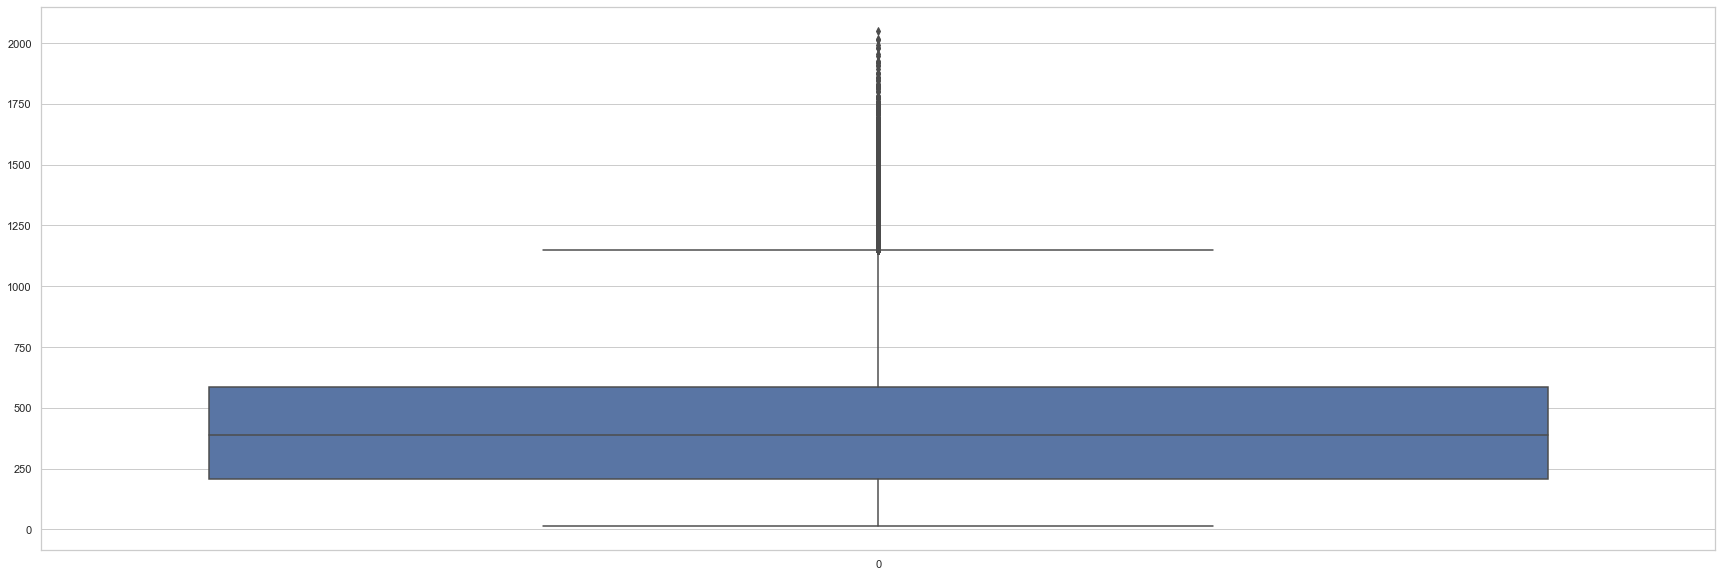

In [159]:
plt.figure(figsize=(30,10), facecolor='w')
sns.boxplot(data=df['Price Charged'])
plt.show()

In [160]:
len(np.where(df['Price Charged']>1200)[0])/len(df)

0.012139947466832873

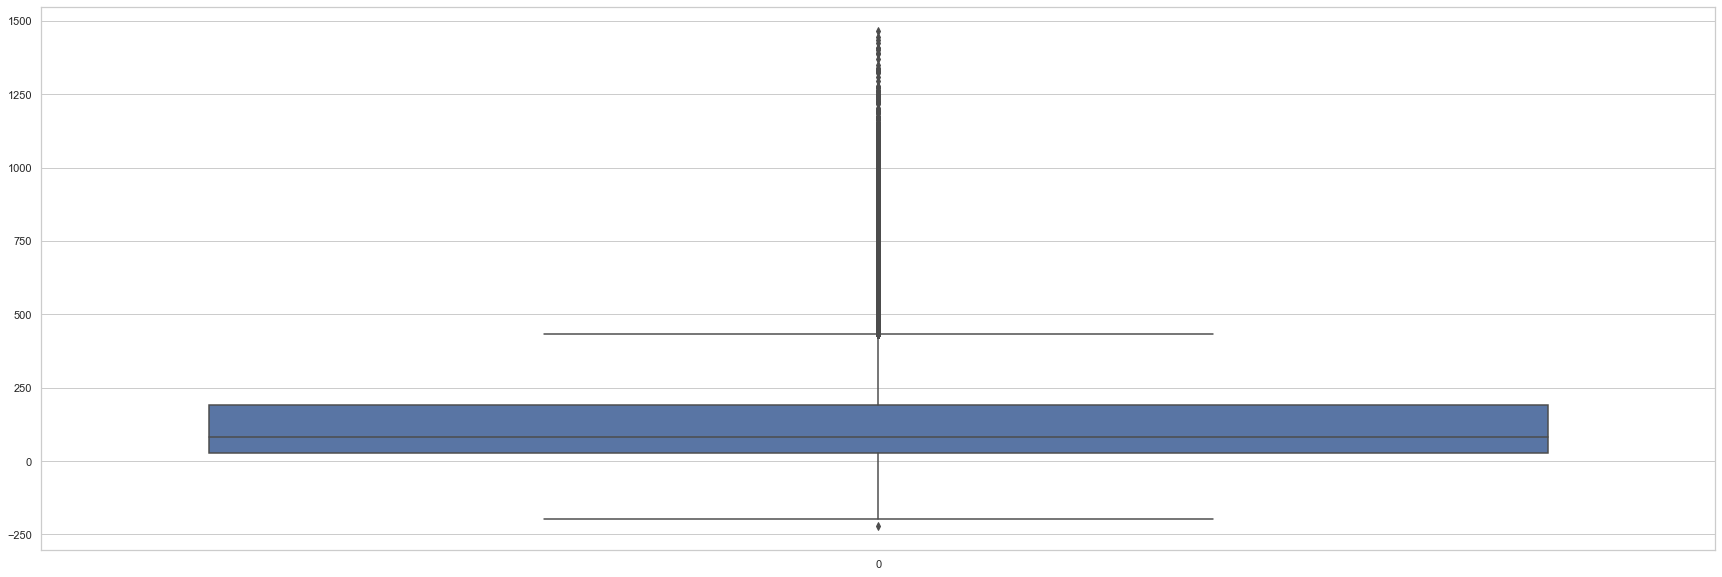

In [161]:
plt.figure(figsize=(30,10), facecolor='w')
sns.boxplot(data=df['Profit'])
plt.show()

In [162]:
len(np.where(df['Profit']>450)[0])/len(df)

0.05926119668773929

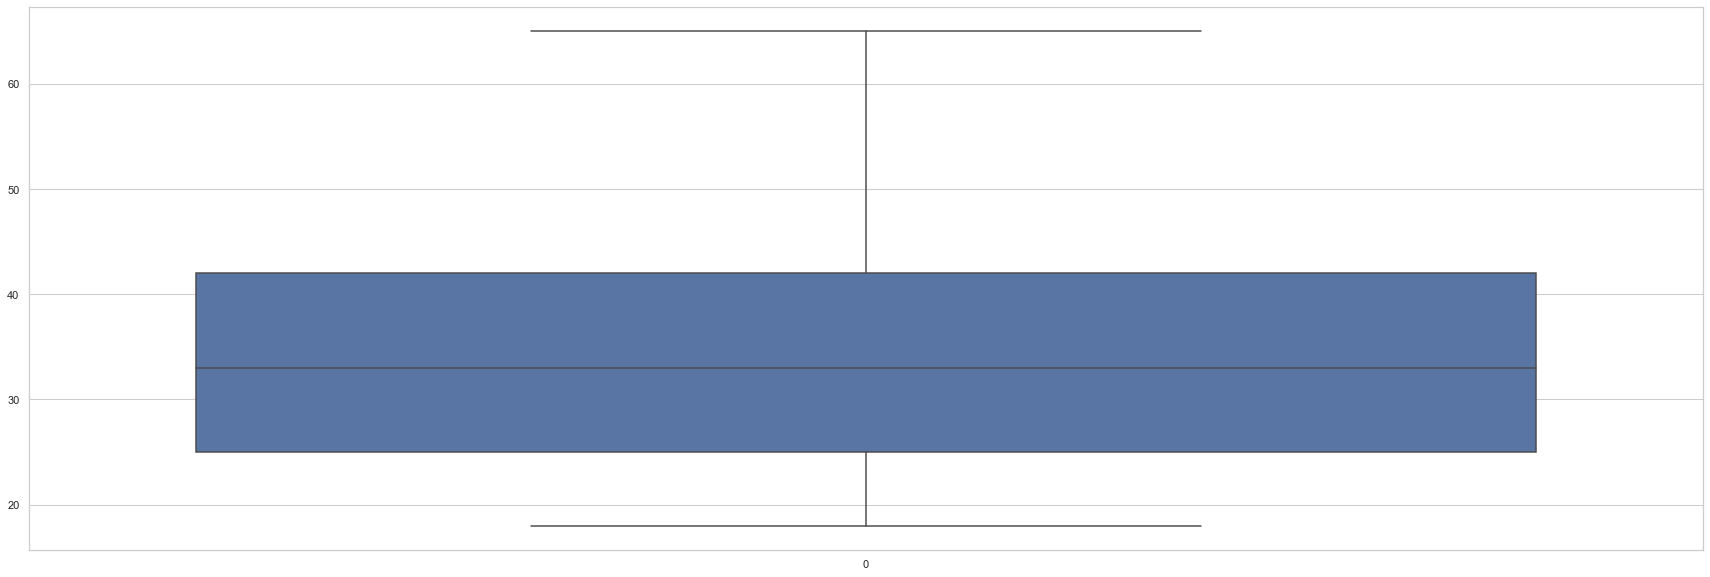

In [163]:
plt.figure(figsize=(30,10), facecolor='w')
sns.boxplot(data=df['Age'])
plt.show()

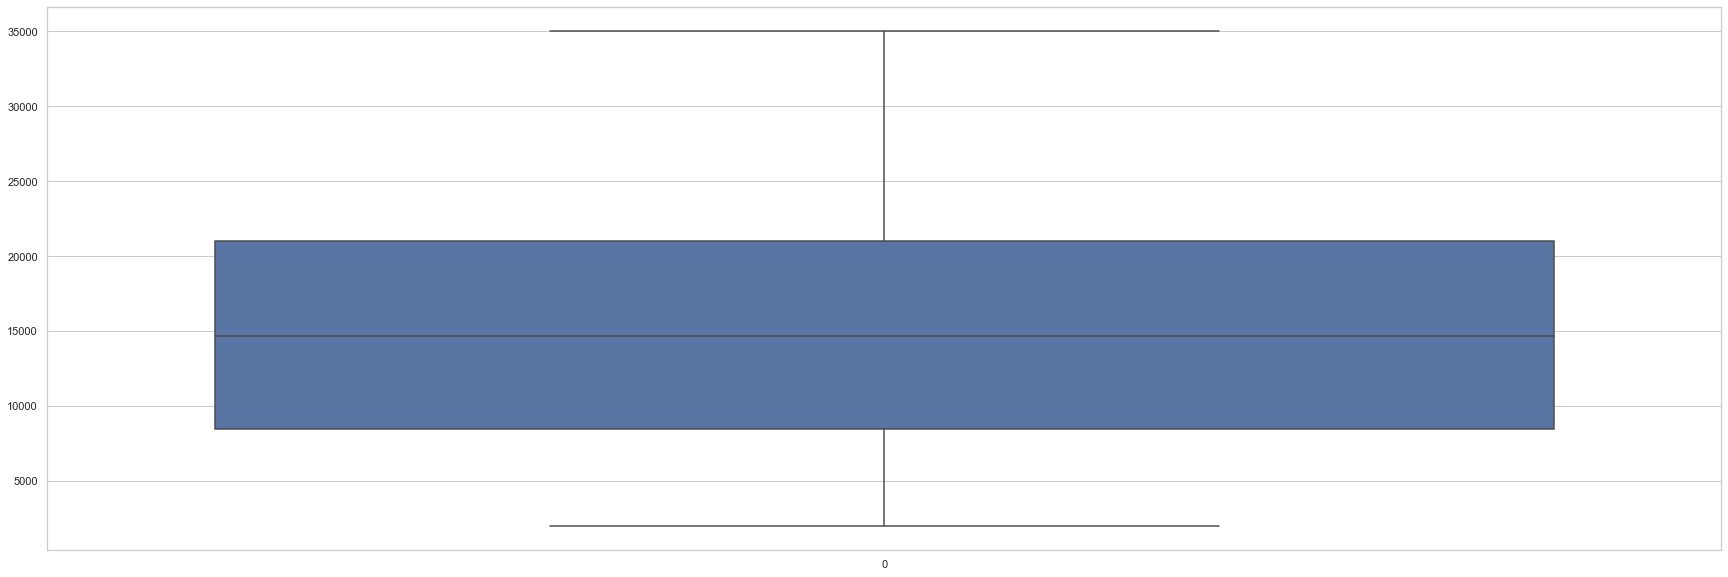

In [164]:
plt.figure(figsize=(30,10), facecolor='w')
sns.boxplot(data=df['Income (USD/Month)'])
plt.show()

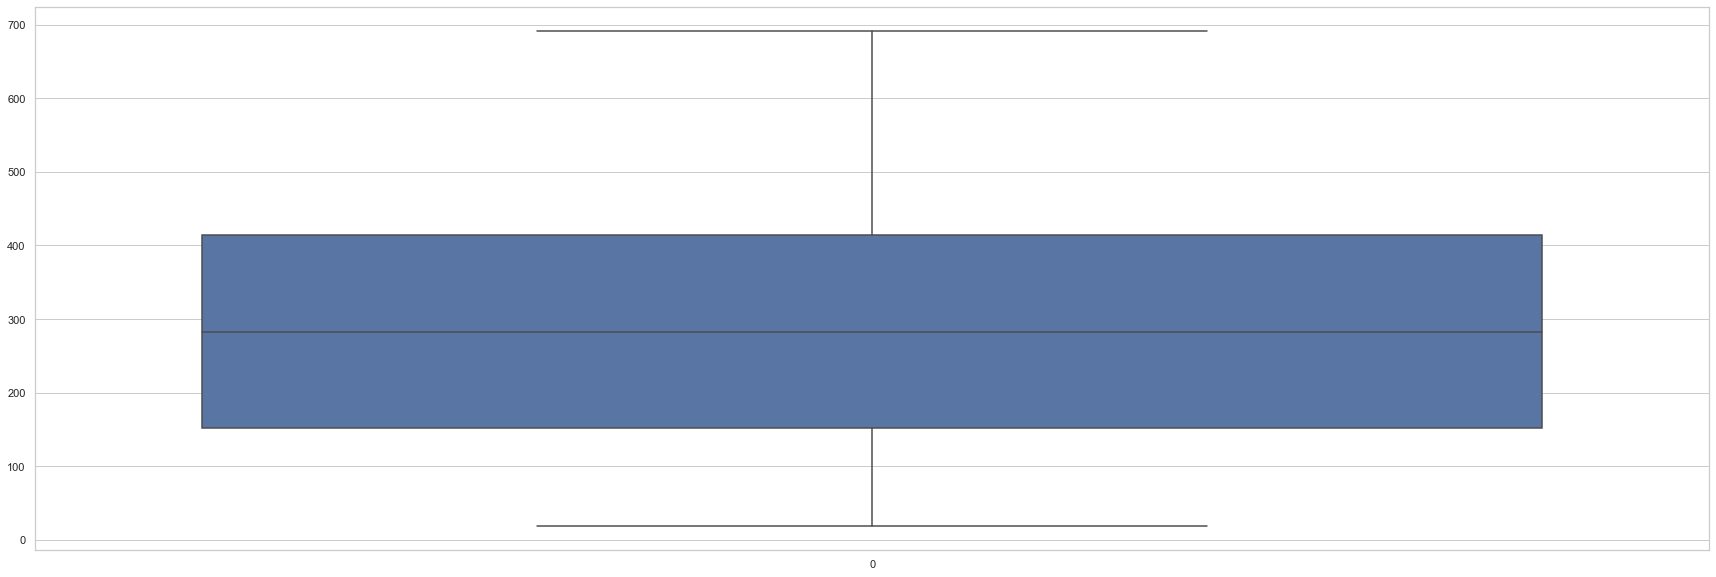

In [165]:
plt.figure(figsize=(30,10), facecolor='w')
sns.boxplot(data=df['Cost of Trip'])
plt.show()

In [166]:
df['z_profit']=np.abs(stats.zscore(df.Profit))
print("Removing Outliers: ", len(df[df['z_profit']>3]))

Removing Outliers:  7244


In [167]:
df = df[df['z_profit']<3]

In [168]:
df['z_price_charged']=np.abs(stats.zscore(df['Price Charged']))
print("Removing Outliers: ", len(df[df['z_price_charged']>3]))

Removing Outliers:  579


In [169]:
df = df[df['z_price_charged']<3]

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351569 entries, 0 to 359391
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      351569 non-null  int64         
 1   Company             351569 non-null  object        
 2   City                351569 non-null  object        
 3   KM Travelled        351569 non-null  float64       
 4   Price Charged       351569 non-null  float64       
 5   Cost of Trip        351569 non-null  float64       
 6   Date                351569 non-null  datetime64[ns]
 7   Profit              351569 non-null  float64       
 8   Customer ID         351569 non-null  int64         
 9   Payment_Mode        351569 non-null  object        
 10  Gender              351569 non-null  object        
 11  Age                 351569 non-null  int64         
 12  Income (USD/Month)  351569 non-null  int64         
 13  Population          351569 no

In [171]:
df.columns

Index(['Transaction ID', 'Company', 'City', 'KM Travelled', 'Price Charged',
       'Cost of Trip', 'Date', 'Profit', 'Customer ID', 'Payment_Mode',
       'Gender', 'Age', 'Income (USD/Month)', 'Population', 'Users',
       'Age group', 'z_profit', 'z_price_charged'],
      dtype='object')

In [172]:
data=df[['Company', 'City', 'KM Travelled', 'Price Charged','Cost of Trip','Profit','Payment_Mode','Gender', 'Age', 'Income (USD/Month)', 'Population', 'Users']]

In [173]:
data.columns

Index(['Company', 'City', 'KM Travelled', 'Price Charged', 'Cost of Trip',
       'Profit', 'Payment_Mode', 'Gender', 'Age', 'Income (USD/Month)',
       'Population', 'Users'],
      dtype='object')

In [174]:
from sklearn.preprocessing import LabelEncoder
lb= LabelEncoder()

In [57]:
lb.fit(data['Company'])

LabelEncoder()

In [58]:
classes= list(lb.classes_)

In [59]:
classes

['Pink Cab', 'Yellow Cab']

In [60]:
data['companies']= lb.fit_transform(data['Company'])

In [61]:
data.head(5)

,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,companies
0,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,Card,Male,28,10813,"814,885","24,701",0
1,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,Cash,Male,28,10813,"814,885","24,701",1
2,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,Card,Male,28,10813,"814,885","24,701",1
3,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,Card,Male,27,9237,"814,885","24,701",0
4,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,Card,Male,27,9237,"814,885","24,701",1


In [62]:
data["companies"].value_counts()

1    274681
0     84711
Name: companies, dtype: int64

In [63]:
data['companies'].nunique() #Gender 1 is male and 0 is female

2

In [64]:
data.drop(["Gender","Payment_Mode","City",], axis=1, inplace=True)

In [65]:
data.head()

,Company,KM Travelled,Price Charged,Cost of Trip,Profit,Age,Income (USD/Month),Population,Users,companies
0,Pink Cab,30.45,370.95,313.6350,57.3150,28,10813,"814,885","24,701",0
1,Yellow Cab,26.19,598.70,317.4228,281.2772,28,10813,"814,885","24,701",1
2,Yellow Cab,42.55,792.05,597.4020,194.6480,28,10813,"814,885","24,701",1
3,Pink Cab,28.62,358.52,334.8540,23.6660,27,9237,"814,885","24,701",0
4,Yellow Cab,36.38,721.10,467.1192,253.9808,27,9237,"814,885","24,701",1


In [66]:
data.drop("Company",axis=1)

,KM Travelled,Price Charged,Cost of Trip,Profit,Age,Income (USD/Month),Population,Users,companies
0,30.45,370.95,313.6350,57.3150,28,10813,"814,885","24,701",0
1,26.19,598.70,317.4228,281.2772,28,10813,"814,885","24,701",1
2,42.55,792.05,597.4020,194.6480,28,10813,"814,885","24,701",1
3,28.62,358.52,334.8540,23.6660,27,9237,"814,885","24,701",0
4,36.38,721.10,467.1192,253.9808,27,9237,"814,885","24,701",1
...,...,...,...,...,...,...,...,...,...
359387,38.40,668.93,525.3120,143.6180,29,6829,"418,859","127,001",1
359388,3.57,67.60,44.5536,23.0464,29,6829,"418,859","127,001",1
359389,23.46,331.97,337.8240,-5.8540,29,6829,"418,859","127,001",1
359390,27.60,358.23,364.3200,-6.0900,29,6829,"418,859","127,001",1


In [67]:
data.Population = data.Population.str.replace(',','').astype(float)
data.Users = data.Users.str.replace(',','').astype(float) # string values noted while normalizing

In [68]:
X = data[['KM Travelled', 'Price Charged', 'Cost of Trip',
       'Profit', 'Age', 'Income (USD/Month)',
       'Population', 'Users', ]]
y = data['Profit']

In [69]:
X

,KM Travelled,Price Charged,Cost of Trip,Profit,Age,Income (USD/Month),Population,Users
0,30.45,370.95,313.6350,57.3150,28,10813,814885.0,24701.0
1,26.19,598.70,317.4228,281.2772,28,10813,814885.0,24701.0
2,42.55,792.05,597.4020,194.6480,28,10813,814885.0,24701.0
3,28.62,358.52,334.8540,23.6660,27,9237,814885.0,24701.0
4,36.38,721.10,467.1192,253.9808,27,9237,814885.0,24701.0
...,...,...,...,...,...,...,...,...
359387,38.40,668.93,525.3120,143.6180,29,6829,418859.0,127001.0
359388,3.57,67.60,44.5536,23.0464,29,6829,418859.0,127001.0
359389,23.46,331.97,337.8240,-5.8540,29,6829,418859.0,127001.0
359390,27.60,358.23,364.3200,-6.0900,29,6829,418859.0,127001.0


In [70]:
y

0          57.3150
1         281.2772
2         194.6480
3          23.6660
4         253.9808
            ...   
359387    143.6180
359388     23.0464
359389     -5.8540
359390     -6.0900
359391     25.7948
Name: Profit, Length: 359392, dtype: float64

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [72]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(287513, 8)
(71879, 8)
(287513,)
(71879,)


In [73]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287513 entries, 333706 to 121958
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   KM Travelled        287513 non-null  float64
 1   Price Charged       287513 non-null  float64
 2   Cost of Trip        287513 non-null  float64
 3   Profit              287513 non-null  float64
 4   Age                 287513 non-null  int64  
 5   Income (USD/Month)  287513 non-null  int64  
 6   Population          287513 non-null  float64
 7   Users               287513 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 19.7 MB


In [74]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
from sklearn import datasets, linear_model, metrics
reg = linear_model.LinearRegression()
 
# train the model using the training sets
reg.fit(X_train, y_train)
 
# regression coefficients
print('Coefficients: ', reg.coef_)

Coefficients:  [ 4.41701109e-12  7.76950039e+02 -2.56966201e+02  1.04026259e+03
 -3.30427177e-14  3.91632269e-14  3.09090484e-13 -1.90962233e-13]


In [76]:

def get_cross_val(model, X_train, y_train, X_valid, y_valid):
    
    # Fit on train, predict on validation
    clf = model
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    
    # Cross validation score over 10 folds
    scores = cross_val_score(clf, X_train, y_train, cv=10)
    print("Cross validation over 10 folds: ", sum(scores)/10.0)
    
    return y_pred

In [77]:
Model = 'Linear Regression'
lin_predicted = reg.predict(X_test)
lin_acc_score = reg.score(X_train, y_train)
print("LinearRegression:",lin_acc_score*100,'\n')
get_cross_val(reg, X_train, y_train, X_test, y_test)

LinearRegression: 100.0 

Cross validation over 10 folds:  1.0


array([160.602 , 797.838 , 384.2092, ..., 349.114 ,  84.3892,  33.36  ])

In [78]:
from sklearn.metrics import mean_squared_error, r2_score

In [79]:
# Make predictions using the testing set
y_pred = reg.predict(X_test)


In [80]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 0.00
Coefficient of determination: 1.00


In [81]:
# The coefficients
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))



Coefficients: 
 [ 4.41701109e-12  7.76950039e+02 -2.56966201e+02  1.04026259e+03
 -3.30427177e-14  3.91632269e-14  3.09090484e-13 -1.90962233e-13]
Mean squared error: 0.00
Coefficient of determination: 1.00
